<a href="https://colab.research.google.com/github/fernandocillo/EG940/blob/main/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo: 
Fernando Teodoro de Cillo RA197029 \\

Guilherme Lôbo Calazans Machado RA235997

# Introdução


O objetivo deste trabalho é aplicar ferramentas de inteligência computacional para desenvolver um sistema de classificação automática de sinais de áudio. Neste trabalho tentaremos diferenciar sons de flauta e de caixa de bateria. \\

A hipótese utilizada é que os parâmetros suficientes para fazer a diferenciação são *Filtros na escala Mel, Centroide Espectral e Spectral Roll-Off*, equanto que a análise cepstral não deve ser de muita utilidade, porque foi planejada para arquivos de fala. Analisando dois arquivos do nosso banco de áudios, confirmamos a hipótese dos parâmetros acústicos. \\

O banco de dados consiste em 40 arquivos de aúdio de caixas de bateria, naturais e sintéticas, e 40 arquivos de áudio de flautas, naturais e sintéticas. Os arquivos podem ser encontrados em https://www.noiiz.com/sounds/instruments/45 e https://www.noiiz.com/sounds/instruments/97, respectivamente. Todas as amostras de áudio foram gravadas no formato mono com frequência de amostragem 44100 Hz.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import librosa

from IPython.display import Audio

sample_rate=44100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bateria='/content/drive/MyDrive/EG940/Projeto2/vasco.wav'
bat, sr = librosa.load(bateria, sr=sample_rate, mono=True)
Audio(bat, rate=sample_rate)

In [ ]:
flauta='/content/drive/MyDrive/EG940/Projeto2/120_Dm_Shakuhachi348_1.wav'
fla, sr = librosa.load(flauta, sr=sample_rate, mono=True)
Audio(fla, rate=sample_rate)

# Parâmetros

## Filtros na escala Mel

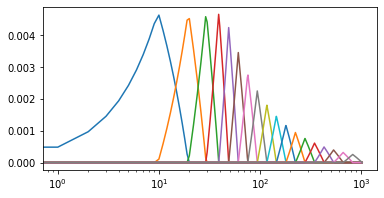

In [ ]:
frame_len = 1024
fb = librosa.filters.mel(sr, n_fft=frame_len*2, n_mels=18)

freqs = np.linspace(0, sr, frame_len*2)
plt.figure(figsize=(6,3))
plt.plot(fb.T)
plt.xscale('log')
plt.show()

In [ ]:
def filtro_Mel(x, frame_len, mels):
  fb = librosa.filters.mel(sr, n_fft=frame_len*2, n_mels=mels)

  X = librosa.stft(x, n_fft=frame_len*2, hop_length=int(frame_len/2), win_length=frame_len)
  plt.figure()
  plt.matshow(np.abs(X).T)
  plt.xlim()
  plt.show()
  return

<Figure size 432x288 with 0 Axes>

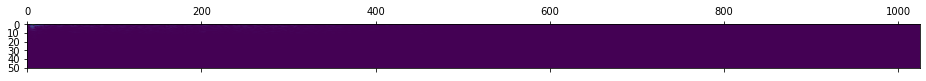

In [ ]:
filtro_Mel(bat, 1024, 18)

<Figure size 432x288 with 0 Axes>

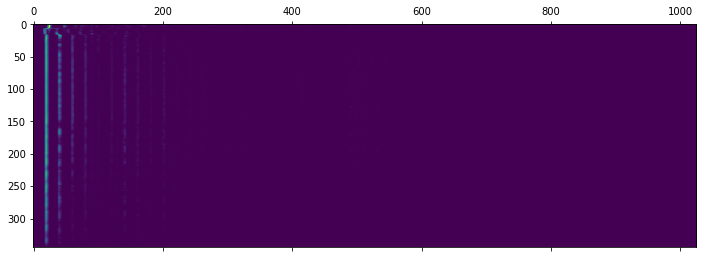

In [ ]:
filtro_Mel(fla, 1024, 18)

##  Centroide Espectral

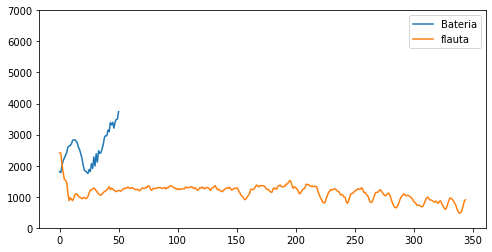

In [ ]:
plt.figure(figsize=(8,4))

y_bat=librosa.feature.spectral_centroid(bat)
y_fla=librosa.feature.spectral_centroid(fla)
plt.plot(y_bat.T, label='Bateria')
plt.plot(y_fla.T, label='flauta')
plt.legend()
plt.ylim([0, 7000])
plt.show()

## Spectral Roll-Off

In [ ]:
from librosa import display

def roll_off(y, sr):
  librosa.feature.spectral_rolloff(y=y, sr=sr)
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.95)
  rolloff
  rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
  rolloff_min

  S, phase = librosa.magphase(librosa.stft(y))
  librosa.feature.spectral_rolloff(S=S, sr=sr)

  fig, ax = plt.subplots()
  librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                          y_axis='log', x_axis='time', ax=ax)
  ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.95)')
  ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
          label='Roll-off frequency (0.01)')
  ax.legend(loc='lower right')
  ax.set(title='log Power spectrogram')
  return

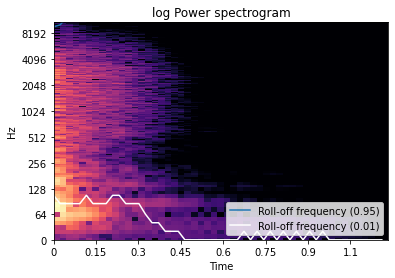

In [ ]:
roll_off(bat, sample_rate)

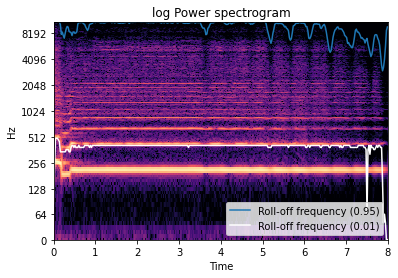

In [ ]:
roll_off(fla, sample_rate)

## Cepstro

In [ ]:
def cepstro_no_tempo(x, frame_len):
  i = 0
  e = []
  while (i+1)*frame_len < len(x):
    X = np.abs(np.fft.fft(x[i*frame_len : (i+1)*frame_len], frame_len*4))
    cepstro = np.abs(np.fft.ifft(np.log10(X)))
    e.append(cepstro)
    i += 1

  e = np.array(e)
  return e

<Figure size 432x288 with 0 Axes>

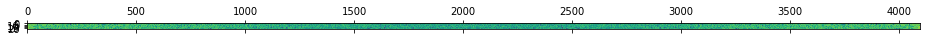

<Figure size 432x288 with 0 Axes>

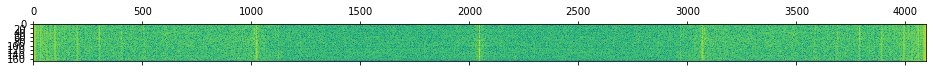

In [ ]:
c1 = cepstro_no_tempo(bat, 1024)
c2 = cepstro_no_tempo(fla, 1024)

c1.shape
c2.shape

plt.figure()
plt.matshow(np.log10(c1[:,1:]))
plt.show()

plt.figure()
plt.matshow(np.log10(c2[:,1:]))
plt.show()

# Importar bibliotecas utilizadas

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import pandas as pd
import os
import scipy.signal
from IPython.display import Audio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diretorio = '/content/drive/MyDrive/EG940/Projeto2/'
planilha = 'Projeto2 - sons.csv'

# Abrir planilha e validar dados

In [ ]:
df = pd.read_csv(diretorio+planilha)
df = df.drop(df.index[0])
#df = df.rename(columns=df.iloc[0]).drop(df.index[0:2])

In [ ]:
df.head()

,filename,tipo,altura
1,105_Am_WoodFlute_348_1.wav,flauta,grave
2,105_G#m_ShakuhachiMya_348_1.wav,flauta,agudo
3,110_G#m_PainedSoloFlute_02_528.wav,flauta,agudo
4,116_C#m_ParanoiacFlute_SP_01_452.wav,flauta,agudo
5,116_F_FluteGlitch_SP_03_452.wav,flauta,grave


In [ ]:
classe_ = 'tipo'

# Checando se arquivos existem, numero de canais e taxa de amostragem
n_files = 0
taxas_de_amostragem = []
duracoes = []
canais = []
classe = []
for index, row in df.iterrows():
  full_fname = diretorio + row['filename']
  if (n_files % 10 == 0):
    print(str(n_files+1) + " " + full_fname)
  if not os.path.exists(full_fname):
    print(row['filename'] + " (index=" + str(n_files) + ") does not exist!")
  else:
    y, sr = librosa.load(full_fname, sr=None)
    taxas_de_amostragem.append(sr)
    duracoes.append(len(y)/sr)
    classe.append(row[classe_].upper())
    n_files += 1
print("Encontrei esse numero de arquivos: " + str(n_files))
df['sr'] = taxas_de_amostragem
df['len'] = duracoes

1 /content/drive/MyDrive/EG940/Projeto2/105_Am_WoodFlute_348_1.wav
11 /content/drive/MyDrive/EG940/Projeto2/120_Dm_Shakuhachi348_1.wav
21 /content/drive/MyDrive/EG940/Projeto2/31_Snare_18_256_SP.wav
31 /content/drive/MyDrive/EG940/Projeto2/90_Am_MelodicSoloFlute_04_528.wav
41 /content/drive/MyDrive/EG940/Projeto2/vasco.wav
51 /content/drive/MyDrive/EG940/Projeto2/Large_SP_67_01.wav
61 /content/drive/MyDrive/EG940/Projeto2/Slinger01WursSnare_02_705.wav
71 /content/drive/MyDrive/EG940/Projeto2/Sonor05FlamClseSnare_02_705.wav
Encontrei esse numero de arquivos: 79


# Descrição dos procedimentos de treino e teste aplicadas

Iremos experimentar modelos de projeções supervisionadas e não-supervisionados com base nos descritores selecionados acima e comparar seus resultados. Os métodos avaliados serão:

*   PCA
*   Projeção Linear
* PCA Não-Linear
* Deep Auto-Encoder
* Rede Neural Clássica
* Rede Neural Profunda
* Lambda Layers
* Lambda Layers concatenadas



In [ ]:
def descritores(full_fname, texture_size=30):
  x, sr = librosa.load(full_fname, sr=44100, mono=True)

  # Calcular descritores e janela de textura
  filt = np.hanning(texture_size)

  y0 = librosa.feature.spectral_centroid(x)[0,:]
  y0_ = scipy.signal.oaconvolve(filt, y0)

  y1 = librosa.feature.spectral_flatness(x)[0,:]
  y1_ = scipy.signal.oaconvolve(filt, y1)

  y2 = librosa.feature.rms(x)[0,:]
  y2_ = scipy.signal.oaconvolve(filt, y2)

  return np.array([np.mean(y0_), np.mean(y1_), np.mean(y2_)])

In [ ]:
n_files = 0
vetores = []
filenames = []
for index, row in df.iterrows():
  if (n_files % 10 == 0):
    print(str(n_files+1) + " " + full_fname)
  full_fname = diretorio + row['filename']
  vect = descritores(full_fname)
  filenames.append(full_fname)
  vetores.append(vect)
  n_files += 1
print("Processei esse número de arquivos: " + str(n_files))
vetores = np.array(vetores)
print(vetores.shape)

1 /content/drive/MyDrive/EG940/Projeto2/ZClap_SP_129_01.wav
11 /content/drive/MyDrive/EG940/Projeto2/120_Dm_SadSoloFlute_02_528.wav
21 /content/drive/MyDrive/EG940/Projeto2/29_Snare_15_36_SP.wav
31 /content/drive/MyDrive/EG940/Projeto2/80_Em_LongFlute_02_565.wav
41 /content/drive/MyDrive/EG940/Projeto2/BlofeldSnare_05_550.wav
51 /content/drive/MyDrive/EG940/Projeto2/HardFLute_SP_54_01.wav
61 /content/drive/MyDrive/EG940/Projeto2/Shinobue_Vib_G6_348.wav
71 /content/drive/MyDrive/EG940/Projeto2/Sonor01FlamCndrSnare_01_705.wav
Processei esse número de arquivos: 79
(79, 3)


## Projeções não-supervisionadas

### Principal Component Analysis

sklearn.preprocessing.StandardScaler => Standardize features by removing the mean and scaling to unit variance.

sklearn.decomposition.PCA => Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


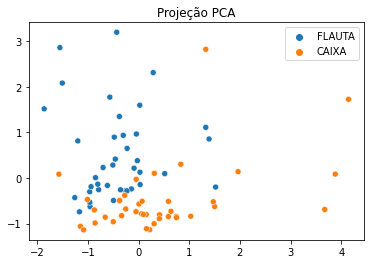

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(vetores)
dados = scaler.transform(vetores)

projection = PCA(2)
dados_ = projection.fit_transform(dados)

plt.figure()
plt.title('Projeção PCA')
sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.show()

### Projeção Linear com Keras

Geramos agora uma arquitetura de rede neural bastante simples, com camadas totalmente conectas e sem viés (bias). A camada de entrada é projetada para uma camada intermediária de 2 dimensões que é conectada a uma camada de saída de mesmo tamanho que a entrada.

O modelo será treinado para minimizar o erro quadrático médio.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 3)]               0         
                                                                 
 projecao (Dense)            (None, 2)                 6         
                                                                 
 recuperacao (Dense)         (None, 3)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


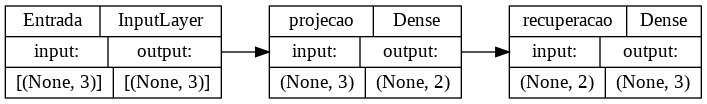

In [ ]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.utils import plot_model

def projecao_linear(n_inputs, n_intermediario):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  x = layers.Dense(n_intermediario, name='projecao', use_bias=False)(x)
  x = layers.Dense(n_inputs, name='recuperacao', use_bias=False)(x)
  model = Model(inputs=input_layer, outputs=x)
  return model

modelo = projecao_linear(dados.shape[1], 2) # Projetando dados em duas dimensoes
modelo.compile(optimizer='rmsprop', loss='mean_squared_error')
modelo.summary()
plot_model(modelo, show_shapes=True, rankdir='LR')

In [ ]:
history = modelo.fit(x=dados, y=dados, epochs=500, verbose=False)

Veremos agora como se comportou o erro de treinamento.

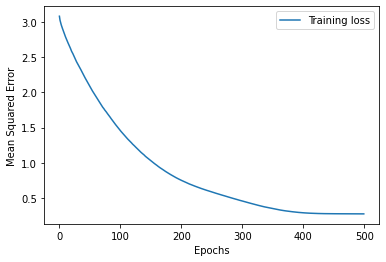

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Acessando saídas intermediarias (PCA com Keras)

A arquitetura que foi construída aprendeu uma redução de dimensionalidade dos dados, no caso para 2 dimensões.
Como não incluímos nenhuma função de ativação (não-linear) na arquitetura, esta arquietura realiza uma PROJEÇÃO LINEAR, que se aproxima do resultado do PCA se olharmos somente a saída da camada intermediária.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 3)]               0         
                                                                 
 projecao (Dense)            (None, 2)                 8         
                                                                 
 recuperacao (Dense)         (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


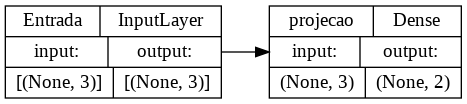

In [ ]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.utils import plot_model

def projecao_linear_2(n_inputs, n_intermediario):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  proj = layers.Dense(n_intermediario, name='projecao')(x)
  x = layers.Dense(n_inputs, name='recuperacao')(proj)
  model = Model(inputs=input_layer, outputs=x)
  model_proj = Model(inputs=input_layer, outputs=proj)
  return model, model_proj

modelo, projecao = projecao_linear_2(dados.shape[1], 2) # Projetando dados em duas dimensoes
modelo.compile(optimizer='rmsprop', loss='mean_squared_error')
modelo.summary()
#plot_model(modelo, show_shapes=True, rankdir='LR')
plot_model(projecao, show_shapes=True, rankdir='LR')

In [ ]:
history = modelo.fit(x=dados, y=dados, epochs=1000, verbose=False)

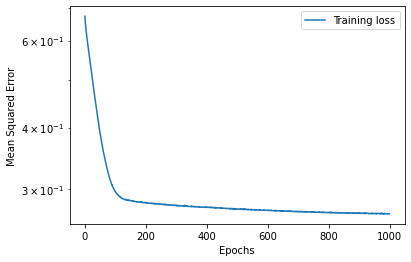

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.semilogy()
plt.legend()
plt.show()

Usando agora a função "predict", que gera uma predição da rede para os dados fornecidos, podemos ver o que a rede está calculando como saída da sua camada intermediária.

3/3 [==============================] - 0s 4ms/step


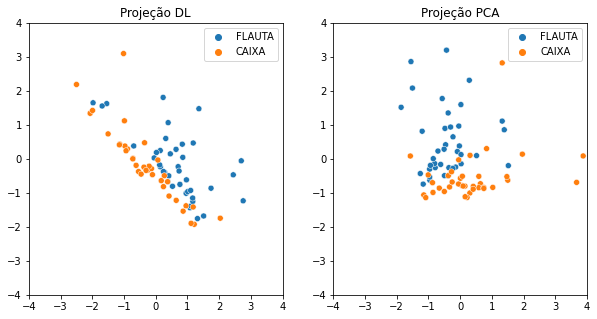

In [ ]:
x_ = projecao.predict(dados)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Projeção DL')
sns.scatterplot(x=x_[:,1],y=x_[:,0], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.subplot(122)
plt.title('Projeção PCA')
sns.scatterplot(x=dados_[:,0],y=dados_[:,1], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### PCA não-linear com Keras

Alteramos a arquitetura anterior de projeção linear adicionando uma função de ativação do tipo ReLU ao fim da camada intermediária.

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 3)]               0         
                                                                 
 projecao (Dense)            (None, 2)                 8         
                                                                 
 recuperacao (Dense)         (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


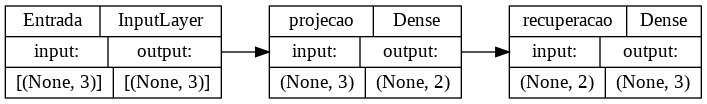

In [ ]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.utils import plot_model

def projecao_nao_linear(n_inputs, n_intermediario):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  #proj = layers.Dense(n_intermediario, activation='relu', name='projecao')(x)
  proj = layers.Dense(n_intermediario, activation='tanh', name='projecao')(x)
  x = layers.Dense(n_inputs, name='recuperacao')(proj)
  model = Model(inputs=input_layer, outputs=x)
  model_proj = Model(inputs=input_layer, outputs=proj)
  return model, model_proj

modelo, projecao = projecao_nao_linear(dados.shape[1], 2) # Projetando dados em duas dimensoes
modelo.compile(optimizer='rmsprop', loss='mean_squared_error')
modelo.summary()
plot_model(modelo, show_shapes=True, rankdir='LR')
#plot_model(projecao, show_shapes=True, rankdir='LR')

In [ ]:
history_nl = modelo.fit(x=dados, y=dados, epochs=1000, verbose=False)

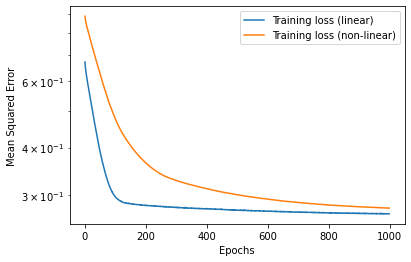

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training loss (linear)')
plt.plot(history_nl.history['loss'], label='Training loss (non-linear)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.semilogy()
plt.legend()
plt.show()

3/3 [==============================] - 0s 4ms/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


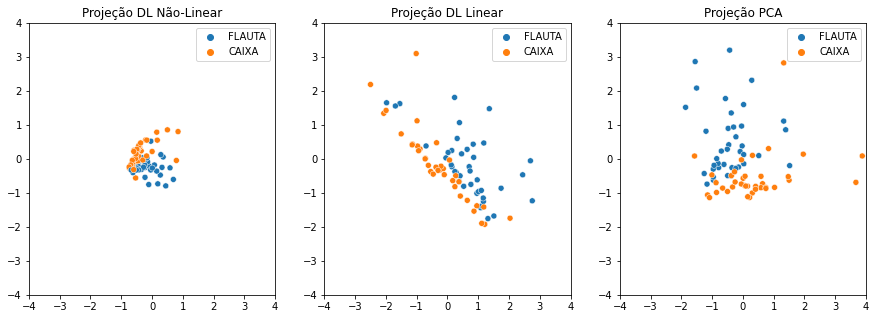

In [ ]:
xnl_ = projecao.predict(dados)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Projeção DL Não-Linear')
sns.scatterplot(xnl_[:,1], xnl_[:,0], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.subplot(132)
plt.title('Projeção DL Linear')
sns.scatterplot(x_[:,1], x_[:,0], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.subplot(133)
plt.title('Projeção PCA')
sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### Deep Auto-Encoder

Auto-encoder que primeira realiza uma redução de dimensionalidade e posteriormente uma recuperação dos dados a partir desdes dados de baixa dimensionalidade (*embeddings*).
Ou seja, a projeção linear que vimos até o momento pode ser entendida como um Auto-encoder.

A diferença para o auto-encoder profundo é que neste segunda caso, temos um número maior de camadas intermediárias que apenas uma, como no caso anterior.

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 9)                 117       
                                                                 
 dense_2 (Dense)             (None, 6)                 60        
                                                                 
 projecao (Dense)            (None, 2)                 14        
                                                                 
 dense_3 (Dense)             (None, 6)                 18        
                                                                 
 dense_4 (Dense)             (None, 9)                 63  

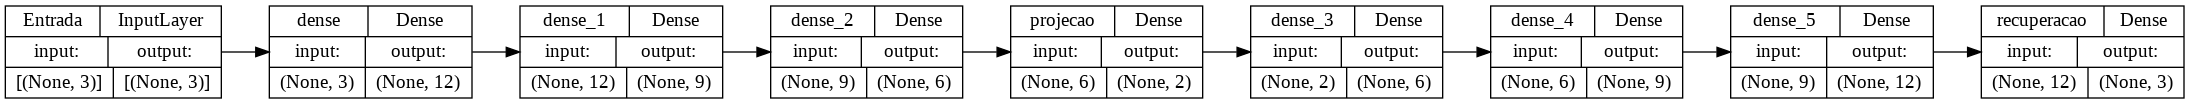

In [ ]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.utils import plot_model

def deep_auto_encoder(n_inputs, n_intermediario):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  x = layers.Dense(n_inputs*4, activation='relu')(x)
  x = layers.Dense(n_inputs*3, activation='relu')(x)
  x = layers.Dense(n_inputs*2, activation='relu')(x)
  proj = layers.Dense(n_intermediario, activation='relu', name='projecao')(x)
  x = layers.Dense(n_inputs*2, activation='relu')(proj)
  x = layers.Dense(n_inputs*3, activation='relu')(x)
  x = layers.Dense(n_inputs*4, activation='relu')(x)
  x = layers.Dense(n_inputs, name='recuperacao')(x)
  model = Model(inputs=input_layer, outputs=x)
  model_proj = Model(inputs=input_layer, outputs=proj)
  return model, model_proj

modelo, projecao = deep_auto_encoder(dados.shape[1], 2) # Projetando dados em duas dimensoes
modelo.compile(optimizer='rmsprop', loss='mean_squared_error')
modelo.summary()
plot_model(modelo, show_shapes=True, rankdir='LR')
#plot_model(projecao, show_shapes=True, rankdir='LR')

In [ ]:
history_dae = modelo.fit(x=dados, y=dados, epochs=1000, verbose=False)

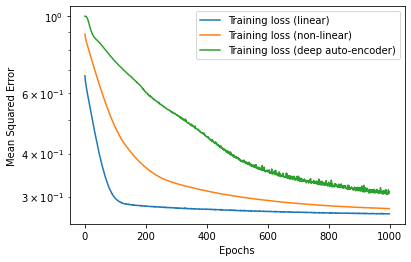

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training loss (linear)')
plt.plot(history_nl.history['loss'], label='Training loss (non-linear)')
plt.plot(history_dae.history['loss'], label='Training loss (deep auto-encoder)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.semilogy()
plt.legend()
plt.show()

3/3 [==============================] - 0s 4ms/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

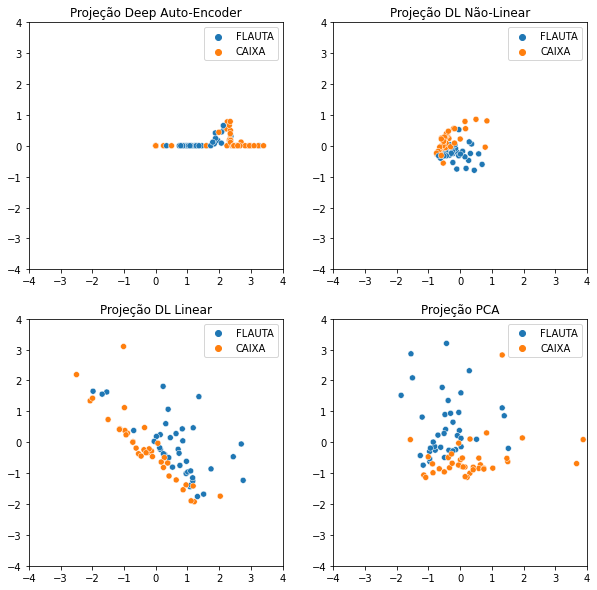

In [ ]:
xdae_ = projecao.predict(dados)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Projeção Deep Auto-Encoder')
sns.scatterplot(xdae_[:,1], xdae_[:,0], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.subplot(222)
plt.title('Projeção DL Não-Linear')
sns.scatterplot(xnl_[:,1], xnl_[:,0], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.subplot(223)
plt.title('Projeção DL Linear')
sns.scatterplot(x_[:,1], x_[:,0], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.subplot(224)
plt.title('Projeção PCA')
sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### Deep Auto-Encoder: Early Stopping e Regularização

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 12)                48        
                                                                 
 dense_7 (Dense)             (None, 9)                 117       
                                                                 
 dense_8 (Dense)             (None, 6)                 60        
                                                                 
 projecao (Dense)            (None, 2)                 14        
                                                                 
 dense_9 (Dense)             (None, 6)                 18        
                                                                 
 dense_10 (Dense)            (None, 9)                 63  

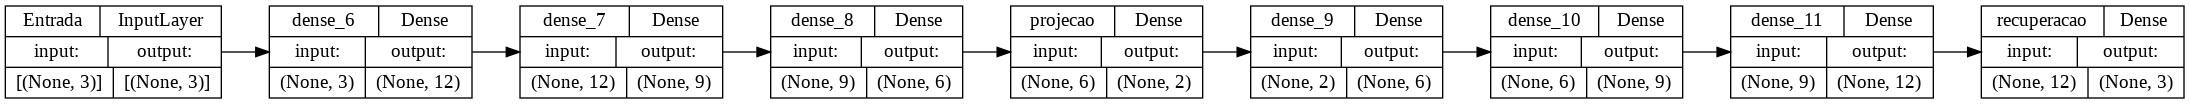

In [ ]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.utils import plot_model

def deep_auto_encoder_es(n_inputs, n_intermediario):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  x = layers.Dense(n_inputs*4, activation='relu')(x)
  x = layers.Dense(n_inputs*3, activation='relu', kernel_regularizer='l1')(x)
  x = layers.Dense(n_inputs*2, activation='relu', kernel_regularizer='l2')(x)
  proj = layers.Dense(n_intermediario, activation='relu', name='projecao')(x)
  x = layers.Dense(n_inputs*2, activation='relu')(proj)
  x = layers.Dense(n_inputs*3, activation='relu', kernel_regularizer='l1')(x)
  x = layers.Dense(n_inputs*4, activation='relu', kernel_regularizer='l2')(x)
  x = layers.Dense(n_inputs, name='recuperacao')(x)
  model = Model(inputs=input_layer, outputs=x)
  model_proj = Model(inputs=input_layer, outputs=proj)
  return model, model_proj

modelo, projecao = deep_auto_encoder_es(dados.shape[1], 2) # Projetando dados em duas dimensoes
modelo.compile(optimizer='rmsprop', loss='mean_squared_error')
modelo.summary()
plot_model(modelo, show_shapes=True, rankdir='LR')
#plot_model(projecao, show_shapes=True, rankdir='LR')

In [ ]:
from keras.callbacks import EarlyStopping
# Early Stopping!!
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
history_dae = modelo.fit(x=dados, y=dados, epochs=1500, verbose=False, validation_split=0.2, callbacks=es)

Restoring model weights from the end of the best epoch: 435.
Epoch 635: early stopping


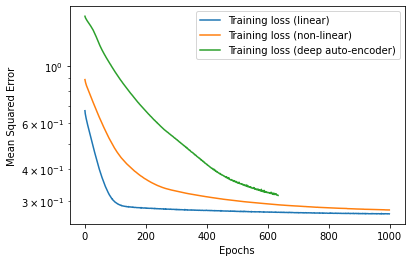

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training loss (linear)')
plt.plot(history_nl.history['loss'], label='Training loss (non-linear)')
plt.plot(history_dae.history['loss'], label='Training loss (deep auto-encoder)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.semilogy()
plt.legend()
plt.show()

3/3 [==============================] - 0s 4ms/step


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

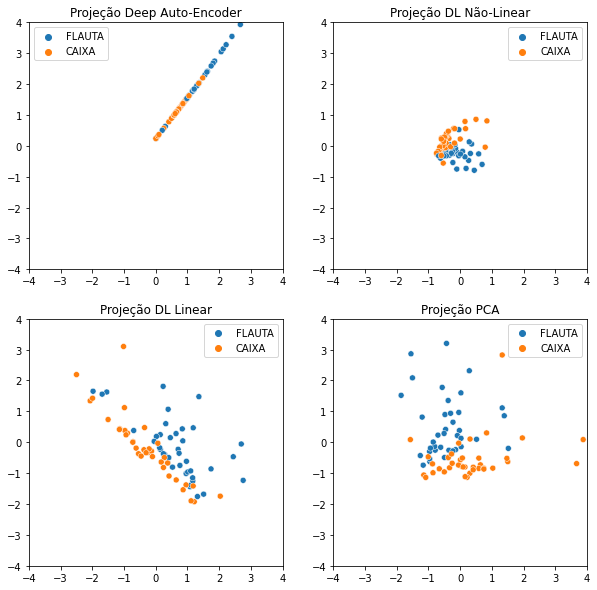

In [ ]:
xdae_ = projecao.predict(dados)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Projeção Deep Auto-Encoder')
sns.scatterplot(xdae_[:,1], xdae_[:,0], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.subplot(222)
plt.title('Projeção DL Não-Linear')
sns.scatterplot(xnl_[:,1], xnl_[:,0], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.subplot(223)
plt.title('Projeção DL Linear')
sns.scatterplot(x_[:,1], x_[:,0], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.subplot(224)
plt.title('Projeção PCA')
sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### Aplicação: classificador automático

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#randon_state sets a seed for your random number generator
X_train, X_test, y_train, y_test = train_test_split(dados, classe, test_size=0.25, random_state=29)

# Escolha do modelo:

#modelo = projecao_linear(dados.shape[1], 2) # modelo linear
#modelo, proj = projecao_nao_linear(dados.shape[1], 2)  # modelo não linear
modelo, proj = deep_auto_encoder_es(dados.shape[1], 2) # deep auto encoder


modelo.compile(optimizer='rmsprop', loss='mean_squared_error')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
history_dae = modelo.fit(x=X_train, y=X_train, epochs=1500, verbose=False, validation_split=0.2, callbacks=es)
X_train_ = proj.predict(X_train)
X_test_ = proj.predict(X_test)

classifier = KNeighborsClassifier(n_neighbors=3)
#classifier = SVC(C=10)
classifier.fit(X_train_, y_train)
y_pred = classifier.predict(X_test_)
print(classification_report(y_test, y_pred))

Restoring model weights from the end of the best epoch: 641.
Epoch 841: early stopping


1/1 [==============================] - 0s 22ms/step
              precision    recall  f1-score   support

       CAIXA       0.75      0.50      0.60        12
      FLAUTA       0.50      0.75      0.60         8

    accuracy                           0.60        20
   macro avg       0.62      0.62      0.60        20
weighted avg       0.65      0.60      0.60        20



Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (InputLayer)        [(None, 3)]               0         
                                                                 
 projecao (Dense)            (None, 2)                 6         
                                                                 
 recuperacao (Dense)         (None, 3)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


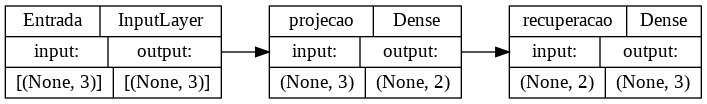

In [ ]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.utils import plot_model

def projecao_linear(n_inputs, n_intermediario):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  x = layers.Dense(n_intermediario, name='projecao', use_bias=False)(x)
  x = layers.Dense(n_inputs, name='recuperacao', use_bias=False)(x)
  model = Model(inputs=input_layer, outputs=x)
  return model

modelo = projecao_linear(dados.shape[1], 2) # Projetando dados em duas dimensoes
modelo.compile(optimizer='rmsprop', loss='mean_squared_error')
modelo.summary()
plot_model(modelo, show_shapes=True, rankdir='LR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


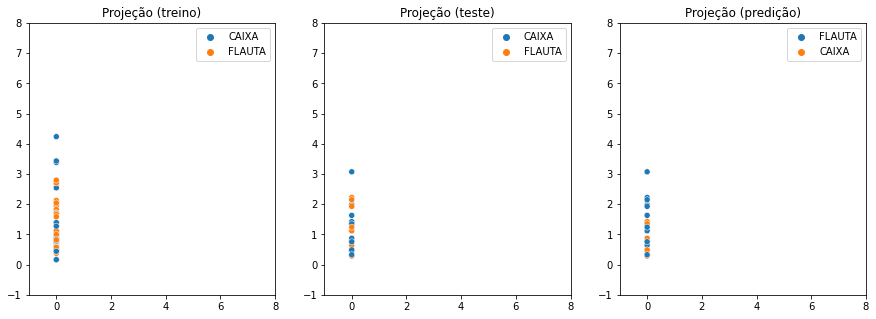

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Projeção (treino)')
sns.scatterplot(X_train_[:,0], X_train_[:,1], hue=y_train)
plt.xlim(-1, 8)
plt.ylim(-1, 8)
plt.subplot(132)
plt.title('Projeção (teste)')
sns.scatterplot(X_test_[:,0], X_test_[:,1], hue=y_test)
plt.xlim(-1, 8)
plt.ylim(-1, 8)
plt.subplot(133)
plt.title('Projeção (predição)')
sns.scatterplot(X_test_[:,0], X_test_[:,1], hue=y_pred)
plt.xlim(-1, 8)
plt.ylim(-1, 8)

plt.show()

## Projeções supervisionadas

### OneHot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
# Representacao one-hot encodig
ohe = OneHotEncoder(sparse=False)
y_onehot = ohe.fit_transform(np.array(classe).reshape(-1,1))
print(classe[:10])
print(y_onehot[:10])
print(y_onehot.shape)
print(ohe.categories_ )

['FLAUTA', 'FLAUTA', 'FLAUTA', 'FLAUTA', 'FLAUTA', 'FLAUTA', 'FLAUTA', 'FLAUTA', 'FLAUTA', 'FLAUTA']
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(79, 2)
[array(['CAIXA', 'FLAUTA'], dtype='<U6')]


### Rede Neural clássica

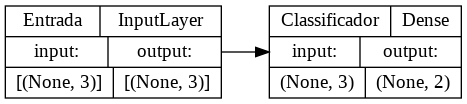

In [ ]:
def rede_neural(n_inputs, n_outputs):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  # Mudar ativacao: tanh para softmax
  x = layers.Dense(n_outputs, name='Classificador', activation='tanh')(x)
  return Model(input_layer, x, name="Preditor")
modelo = rede_neural(dados.shape[1], y_onehot.shape[1])
modelo.compile(optimizer='adam', loss='categorical_crossentropy')
plot_model(modelo, show_shapes=True, rankdir='LR')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
X_train, X_test, y_train, y_test = train_test_split(dados, y_onehot, test_size=0.25, random_state=29)
history = modelo.fit(x=X_train, y=y_train, epochs=1500, verbose=False, validation_split=0.2, callbacks=es)
y_pred = modelo.predict(X_test)

Restoring model weights from the end of the best epoch: 176.
Epoch 376: early stopping


1/1 [==============================] - 0s 51ms/step


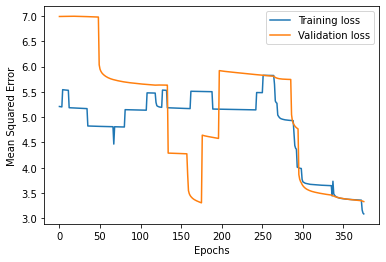

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
print(y_test.shape)
print(y_pred.shape)
y_test_ = np.argmax(y_test, axis=1)
y_pred_ = np.argmax(y_pred, axis=1)
print(classification_report(y_test_, y_pred_))

(20, 2)
(20, 2)
              precision    recall  f1-score   support

           0       0.17      0.08      0.11        12
           1       0.21      0.38      0.27         8

    accuracy                           0.20        20
   macro avg       0.19      0.23      0.19        20
weighted avg       0.19      0.20      0.18        20



### Rede Neural Profunda

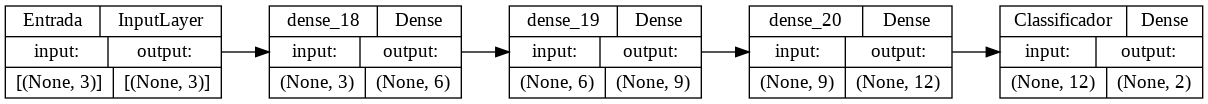

In [ ]:
def rede_neural_profunda(n_inputs, n_outputs):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  x = layers.Dense(n_inputs*2, activation='relu')(x)
  x = layers.Dense(n_inputs*3, activation='relu')(x)
  proj = layers.Dense(n_inputs*4, activation='relu')(x)
  x = layers.Dense(n_outputs, name='Classificador', activation='softmax')(proj)
  return Model(input_layer, x, name="Preditor"), Model(input_layer, proj, name="Features")
modelo, projetor = rede_neural_profunda(dados.shape[1], y_onehot.shape[1])
modelo.compile(optimizer='adam', loss='categorical_crossentropy')
plot_model(modelo, show_shapes=True, rankdir='LR')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
X_train, X_test, y_train, y_test = train_test_split(dados, y_onehot, test_size=0.25, random_state=29)
history = modelo.fit(x=X_train, y=y_train, epochs=1500, verbose=False, validation_split=0.2, callbacks=es)
y_pred = modelo.predict(X_test)

Restoring model weights from the end of the best epoch: 441.
Epoch 641: early stopping
1/1 [==============================] - 0s 101ms/step


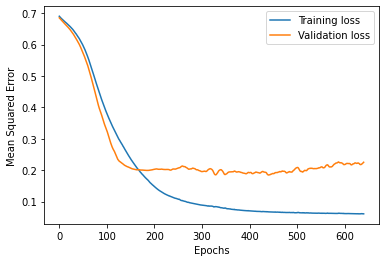

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
print(y_test.shape)
print(y_pred.shape)
y_train_ = ohe.categories_ [0][np.argmax(y_train, axis=1)]
y_test_ = ohe.categories_ [0][np.argmax(y_test, axis=1)]
y_pred_ = ohe.categories_ [0][np.argmax(y_pred, axis=1)]
print(classification_report(y_test_, y_pred_))

(20, 2)
(20, 2)
              precision    recall  f1-score   support

       CAIXA       0.80      0.67      0.73        12
      FLAUTA       0.60      0.75      0.67         8

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20



2/2 [==============================] - 0s 6ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning

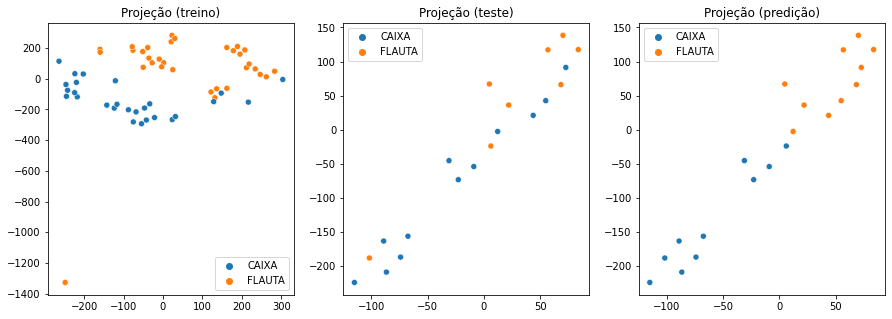

In [ ]:
# Visualizacao do espaço latente com isomap
from sklearn.manifold import TSNE

perplexity = 5
proj_train = projetor.predict(X_train)
tsne = TSNE(2, perplexity=perplexity)
X_train_ = tsne.fit_transform(proj_train)

proj_test = projetor.predict(X_test)
tsne = TSNE(2, perplexity=perplexity)
X_test_ = tsne.fit_transform(proj_test)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Projeção (treino)')
sns.scatterplot(X_train_[:,0], X_train_[:,1], hue=y_train_)
plt.subplot(132)
plt.title('Projeção (teste)')
sns.scatterplot(X_test_[:,0], X_test_[:,1], hue=y_test_)
plt.subplot(133)
plt.title('Projeção (predição)')
sns.scatterplot(X_test_[:,0], X_test_[:,1], hue=y_pred_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


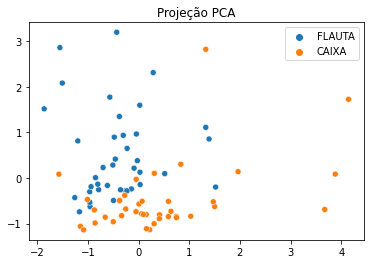

In [ ]:
from sklearn.decomposition import PCA

projection = PCA(2)
dados_ = projection.fit_transform(dados)

plt.figure()
plt.title('Projeção PCA')
sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


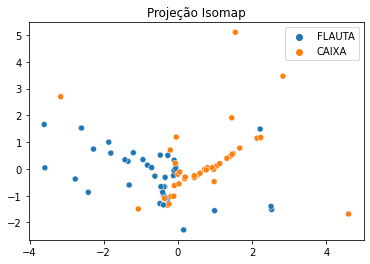

In [ ]:
from sklearn.manifold import Isomap

projection = Isomap(n_components=2)
dados_ = projection.fit_transform(dados)

plt.figure()
plt.title('Projeção Isomap')
sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


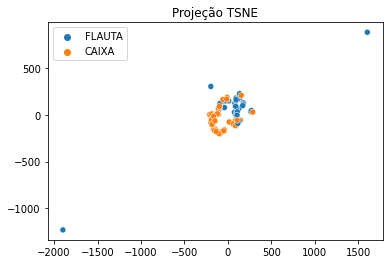

In [ ]:
from sklearn.manifold import TSNE

projection = TSNE(2, perplexity=5)
dados_ = projection.fit_transform(dados)


plt.figure()
plt.title('Projeção TSNE')
sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.show()

### Lambda Layers (funções arbitrárias)



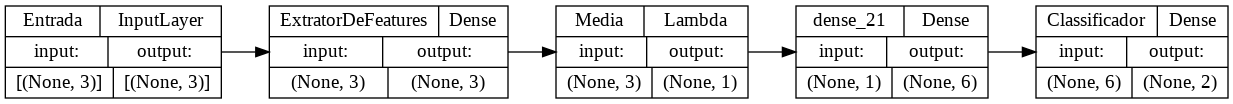

In [ ]:
import tensorflow as tf
def my_mean(x):
  return tf.math.reduce_mean(x, axis=1, keepdims=True)

def rede_neural_com_lambda(n_inputs, n_outputs):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  proj = layers.Dense(n_inputs, activation='relu', name='ExtratorDeFeatures')(x)
  # Ideia: a norma da projecao eh que sera usada para fazer a classificacao
  x = layers.Lambda(my_mean, name="Media")(proj)
  x = layers.Dense(n_outputs*3,  activation='relu')(x)
  x = layers.Dense(n_outputs, name='Classificador', activation='softmax')(x)
  return Model(input_layer, x, name="Preditor"), Model(input_layer, proj, name="Features")

modelo, projetor = rede_neural_com_lambda(dados.shape[1], y_onehot.shape[1])
modelo.compile(optimizer='rmsprop', loss='categorical_crossentropy')
plot_model(modelo, show_shapes=True, rankdir='LR')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
X_train, X_test, y_train, y_test = train_test_split(dados, y_onehot, test_size=0.25, random_state=29)
history = modelo.fit(x=X_train, y=y_train, epochs=1500, verbose=False, validation_split=0.2, callbacks=es)
y_pred = modelo.predict(X_test)

1/1 [==============================] - 0s 68ms/step


In [ ]:
y_train_ = ohe.categories_ [0][np.argmax(y_train, axis=1)]
y_test_ = ohe.categories_ [0][np.argmax(y_test, axis=1)]
y_pred_ = ohe.categories_ [0][np.argmax(y_pred, axis=1)]
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

       CAIXA       0.70      0.58      0.64        12
      FLAUTA       0.50      0.62      0.56         8

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.62      0.60      0.60        20



2/2 [==============================] - 0s 6ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning

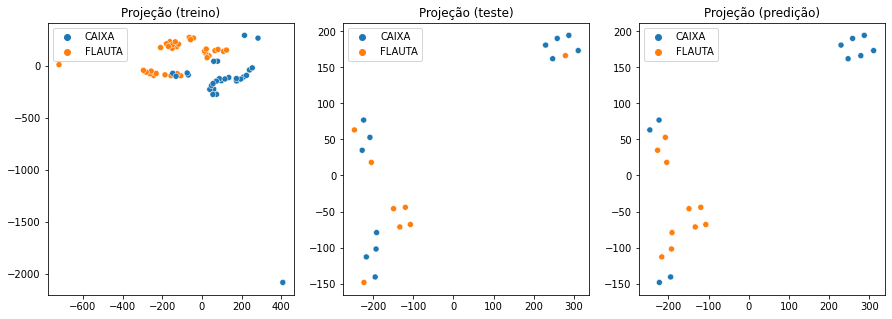

In [ ]:
# Visualizacao do espaço latente com isomap
from sklearn.manifold import TSNE

perplexity = 5
proj_train = projetor.predict(X_train)
tsne = TSNE(2, perplexity=perplexity)
X_train_ = tsne.fit_transform(proj_train)

proj_test = projetor.predict(X_test)
tsne = TSNE(2, perplexity=perplexity)
X_test_ = tsne.fit_transform(proj_test)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Projeção (treino)')
sns.scatterplot(X_train_[:,0], X_train_[:,1], hue=y_train_)
plt.subplot(132)
plt.title('Projeção (teste)')
sns.scatterplot(X_test_[:,0], X_test_[:,1], hue=y_test_)
plt.subplot(133)
plt.title('Projeção (predição)')
sns.scatterplot(X_test_[:,0], X_test_[:,1], hue=y_pred_)

### Concatenando layers



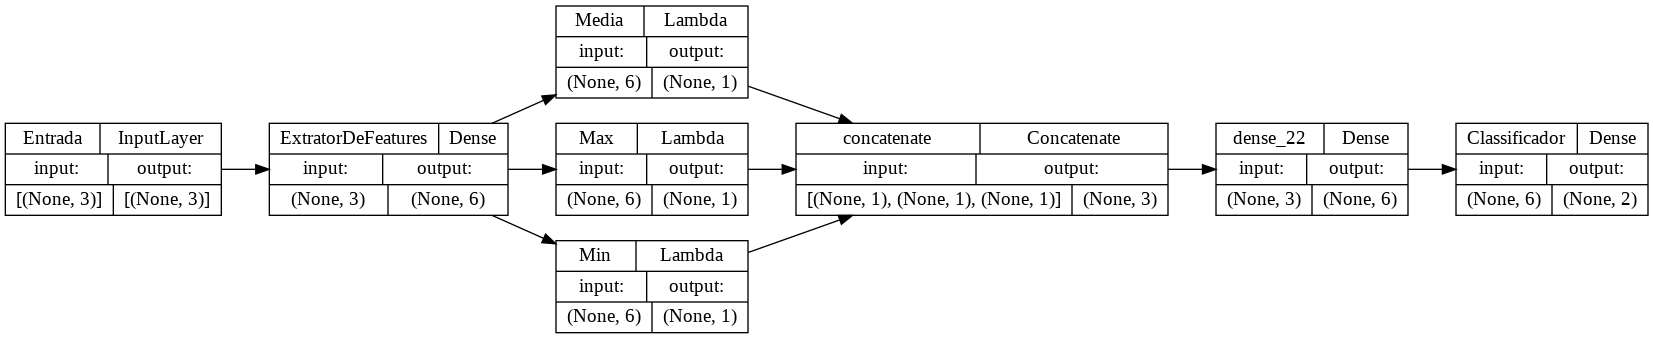

In [ ]:
import tensorflow as tf
def my_mean(x):
  return tf.math.reduce_mean(x, axis=1, keepdims=True)

def my_max(x):
  return tf.math.reduce_max(x, axis=1, keepdims=True)

def my_min(x):
  return tf.math.reduce_min(x, axis=1, keepdims=True)

def rede_neural_com_lambdas_em_paralelo(n_inputs, n_outputs):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  proj = layers.Dense(n_inputs*2, activation='relu', name='ExtratorDeFeatures')(x)

  x0 = layers.Lambda(my_mean, name="Media")(proj)
  x1 = layers.Lambda(my_max, name="Max")(proj)
  x2 = layers.Lambda(my_min, name="Min")(proj)
  x = layers.Concatenate()([x0,x1,x2])

  x = layers.Dense(n_outputs*3,  activation='relu')(x)
  x = layers.Dense(n_outputs, name='Classificador', activation='softmax')(x)
  return Model(input_layer, x, name="Preditor"), Model(input_layer, proj, name="Features")

modelo, projetor = rede_neural_com_lambdas_em_paralelo(dados.shape[1], y_onehot.shape[1])
modelo.compile(optimizer='rmsprop', loss='categorical_crossentropy')
plot_model(modelo, show_shapes=True, rankdir='LR')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
X_train, X_test, y_train, y_test = train_test_split(dados, y_onehot, test_size=0.25, random_state=29)
history = modelo.fit(x=X_train, y=y_train, epochs=1500, verbose=False, validation_split=0.2, callbacks=es)
y_pred = modelo.predict(X_test)

Restoring model weights from the end of the best epoch: 1086.
Epoch 1286: early stopping
1/1 [==============================] - 0s 76ms/step


In [ ]:
y_train_ = ohe.categories_ [0][np.argmax(y_train, axis=1)]
y_test_ = ohe.categories_ [0][np.argmax(y_test, axis=1)]
y_pred_ = ohe.categories_ [0][np.argmax(y_pred, axis=1)]
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

       CAIXA       0.80      0.67      0.73        12
      FLAUTA       0.60      0.75      0.67         8

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20



2/2 [==============================] - 0s 6ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning

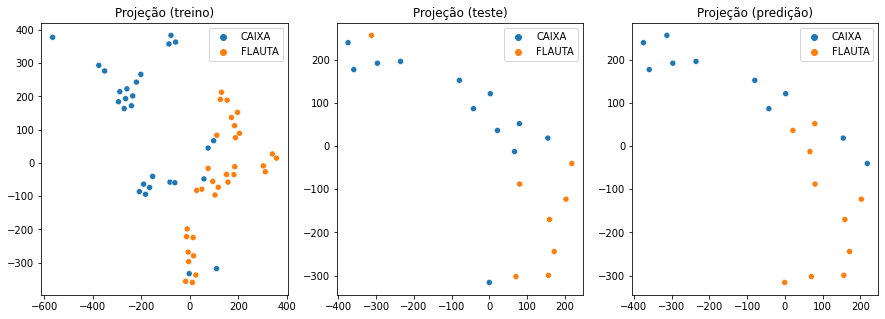

In [ ]:
# Visualizacao do espaço latente com isomap
from sklearn.manifold import TSNE

perplexity = 5
proj_train = projetor.predict(X_train)
tsne = TSNE(2, perplexity=perplexity)
X_train_ = tsne.fit_transform(proj_train)

proj_test = projetor.predict(X_test)
tsne = TSNE(2, perplexity=perplexity)
X_test_ = tsne.fit_transform(proj_test)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Projeção (treino)')
sns.scatterplot(X_train_[:,0], X_train_[:,1], hue=y_train_)
plt.subplot(132)
plt.title('Projeção (teste)')
sns.scatterplot(X_test_[:,0], X_test_[:,1], hue=y_test_)
plt.subplot(133)
plt.title('Projeção (predição)')
sns.scatterplot(X_test_[:,0], X_test_[:,1], hue=y_pred_)

# Contra-exemplo

Como contra-exemplo, tomamos a característica acústica *altura, em grave e agudo*. A altura não é relevante para a classificação de um som de bateria ou de flauta, visto que é possível haver sons graves e agudos provenientes dos dois instrumentos.

Assim, é esperado que o resultado estatístico divirja da classificação acústica anterior baseada em características relevantes. Abaixo, iremos realizar os testes e projeções com o contra-exemplo.

In [ ]:
classe_ = 'altura'

# Checando se arquivos existem, numero de canais e taxa de amostragem
n_files = 0
taxas_de_amostragem = []
duracoes = []
canais = []
classe = []
for index, row in df.iterrows():
  full_fname = diretorio + row['filename']
  if (n_files % 10 == 0):
    print(str(n_files+1) + " " + full_fname)
  if not os.path.exists(full_fname):
    print(row['filename'] + " (index=" + str(n_files) + ") does not exist!")
  else:
    y, sr = librosa.load(full_fname, sr=None)
    taxas_de_amostragem.append(sr)
    duracoes.append(len(y)/sr)
    classe.append(row[classe_].upper())
    n_files += 1
print("Encontrei esse numero de arquivos: " + str(n_files))
df['sr'] = taxas_de_amostragem
df['len'] = duracoes

1 /content/drive/MyDrive/EG940/Projeto2/105_Am_WoodFlute_348_1.wav
11 /content/drive/MyDrive/EG940/Projeto2/120_Dm_Shakuhachi348_1.wav
21 /content/drive/MyDrive/EG940/Projeto2/31_Snare_18_256_SP.wav
31 /content/drive/MyDrive/EG940/Projeto2/90_Am_MelodicSoloFlute_04_528.wav
41 /content/drive/MyDrive/EG940/Projeto2/vasco.wav
51 /content/drive/MyDrive/EG940/Projeto2/Large_SP_67_01.wav
61 /content/drive/MyDrive/EG940/Projeto2/Slinger01WursSnare_02_705.wav
71 /content/drive/MyDrive/EG940/Projeto2/Sonor05FlamClseSnare_02_705.wav
Encontrei esse numero de arquivos: 79


In [ ]:
def descritores(full_fname, texture_size=30):
  x, sr = librosa.load(full_fname, sr=44100, mono=True)

  # Calcular descritores e janela de textura
  filt = np.hanning(texture_size)

  y0 = librosa.feature.spectral_centroid(x)[0,:]
  y0_ = scipy.signal.oaconvolve(filt, y0)

  y1 = librosa.feature.spectral_flatness(x)[0,:]
  y1_ = scipy.signal.oaconvolve(filt, y1)

  y2 = librosa.feature.rms(x)[0,:]
  y2_ = scipy.signal.oaconvolve(filt, y2)

  return np.array([np.mean(y0_), np.mean(y1_), np.mean(y2_)])

In [ ]:
n_files = 0
vetores = []
filenames = []
for index, row in df.iterrows():
  if (n_files % 10 == 0):
    print(str(n_files+1) + " " + full_fname)
  full_fname = diretorio + row['filename']
  vect = descritores(full_fname)
  filenames.append(full_fname)
  vetores.append(vect)
  n_files += 1
print("Processei esse número de arquivos: " + str(n_files))
vetores = np.array(vetores)
print(vetores.shape)

1 /content/drive/MyDrive/EG940/Projeto2/ZClap_SP_129_01.wav
11 /content/drive/MyDrive/EG940/Projeto2/120_Dm_SadSoloFlute_02_528.wav
21 /content/drive/MyDrive/EG940/Projeto2/29_Snare_15_36_SP.wav
31 /content/drive/MyDrive/EG940/Projeto2/80_Em_LongFlute_02_565.wav
41 /content/drive/MyDrive/EG940/Projeto2/BlofeldSnare_05_550.wav
51 /content/drive/MyDrive/EG940/Projeto2/HardFLute_SP_54_01.wav
61 /content/drive/MyDrive/EG940/Projeto2/Shinobue_Vib_G6_348.wav
71 /content/drive/MyDrive/EG940/Projeto2/Sonor01FlamCndrSnare_01_705.wav
Processei esse número de arquivos: 79
(79, 3)


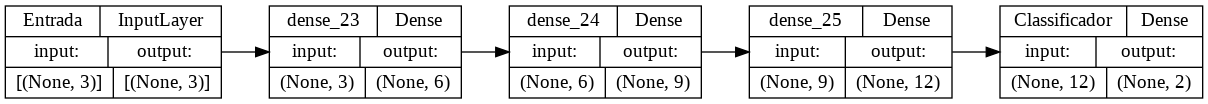

In [ ]:
def rede_neural_profunda(n_inputs, n_outputs):
  input_layer = Input(shape=n_inputs, name='Entrada')
  x = input_layer
  x = layers.Dense(n_inputs*2, activation='relu')(x)
  x = layers.Dense(n_inputs*3, activation='relu')(x)
  proj = layers.Dense(n_inputs*4, activation='relu')(x)
  x = layers.Dense(n_outputs, name='Classificador', activation='softmax')(proj)
  return Model(input_layer, x, name="Preditor"), Model(input_layer, proj, name="Features")
modelo, projetor = rede_neural_profunda(dados.shape[1], y_onehot.shape[1])
modelo.compile(optimizer='adam', loss='categorical_crossentropy')
plot_model(modelo, show_shapes=True, rankdir='LR')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
X_train, X_test, y_train, y_test = train_test_split(dados, y_onehot, test_size=0.25, random_state=29)
history = modelo.fit(x=X_train, y=y_train, epochs=1500, verbose=False, validation_split=0.2, callbacks=es)
y_pred = modelo.predict(X_test)

Restoring model weights from the end of the best epoch: 196.
Epoch 396: early stopping
1/1 [==============================] - 0s 88ms/step


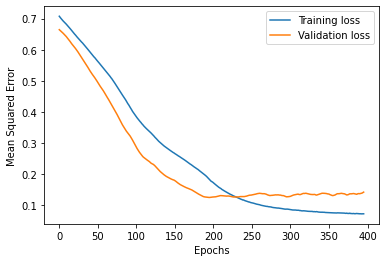

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
print(y_test.shape)
print(y_pred.shape)
y_train_ = ohe.categories_ [0][np.argmax(y_train, axis=1)]
y_test_ = ohe.categories_ [0][np.argmax(y_test, axis=1)]
y_pred_ = ohe.categories_ [0][np.argmax(y_pred, axis=1)]
print(classification_report(y_test_, y_pred_))

(20, 2)
(20, 2)
              precision    recall  f1-score   support

       CAIXA       0.89      0.67      0.76        12
      FLAUTA       0.64      0.88      0.74         8

    accuracy                           0.75        20
   macro avg       0.76      0.77      0.75        20
weighted avg       0.79      0.75      0.75        20



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


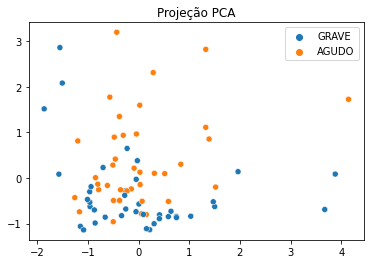

In [ ]:
from sklearn.decomposition import PCA

projection = PCA(2)
dados_ = projection.fit_transform(dados)

plt.figure()
plt.title('Projeção PCA')
sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


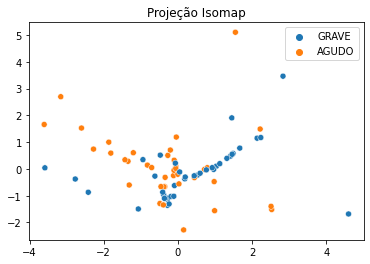

In [ ]:
from sklearn.manifold import Isomap

projection = Isomap(n_components=2)
dados_ = projection.fit_transform(dados)

plt.figure()
plt.title('Projeção Isomap')
sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


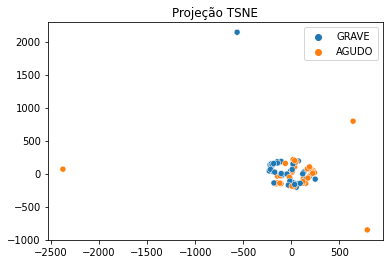

In [ ]:
from sklearn.manifold import TSNE

projection = TSNE(2, perplexity=5)
dados_ = projection.fit_transform(dados)


plt.figure()
plt.title('Projeção TSNE')
sns.scatterplot(dados_[:,0], dados_[:,1], hue=classe)
plt.show()

# Resultados

In [ ]:
tabela_acuracia = pd.DataFrame({"Modelo":["Linear", "Não-Linear", "Deep Auto-Encoder", "Rede Neural Clássica",
                                          "Rede Neural Profunda", "Lamba Layers", "Lamba Layers concatenadas"],
                                "macro avg máximo":["0.81", "0.90", "0.93", "0.76",
                                          "0.90", "0.85", "0.90"],
                                "weighted avg máximo":["0.80", "0.88", "0.90", "0.79",
                                          "0.88", "0.85", "0.88"],
                                "macro avg mínimo":["0.81", "0.69", "0.42", "0.19",
                                          "0.70", "0.60", "0.70"],
                                "weighted avg mínimo":["0.80", "0.70", "0.43", "0.19",
                                          "0.72", "0.62", "0.72"],
                                })
tabela_acuracia

,Modelo,macro avg máximo,weighted avg máximo,macro avg mínimo,weighted avg mínimo
0,Linear,0.81,0.80,0.81,0.80
1,Não-Linear,0.90,0.88,0.69,0.70
2,Deep Auto-Encoder,0.93,0.90,0.42,0.43
3,Rede Neural Clássica,0.76,0.79,0.19,0.19
4,Rede Neural Profunda,0.90,0.88,0.70,0.72
5,Lamba Layers,0.85,0.85,0.60,0.62
6,Lamba Layers concatenadas,0.90,0.88,0.70,0.72


# Conclusão

Avaliando a precisão e acurácia dos modelos, chegamos à conclusão de que há projeções supervisionadas e não-supervisionadas que satisfazem bem o nosso problema. \\

Para as projeções não-supervisionadas, o modelo mais consistente foi o da Projeção Linear. Os modelos Não-Linear  e Deep Auto-Encoder atingiram valores maiores de acurácia em certos pontos de execução, porém em outras execuções foram muito menores do que do modelo Linear, assim sendo pela constância na obtenção de bons resultados, o modelo Linear é o mais consistente e preciso dos modelos não-supervizionados. \\

Estes resultados condizem com a teoria, que diz que o modelo Deep Auto-Encoder é melhor para casos em que muitas variáveis devem ser levadas em consideração, e o modelo Linear não seria suficiente. Como para o nosso classificador apenas poucos parâmetros são suficientes, o modelo Linear é capaz de fazer uma boa separação, enquanto que modelos mais complicados acabam se descalibrando por levar em consideração muitos parâmetros, o que explica os casos em que os modelos Não-Linear e Deep Auto-Encoder atingiram resultados péssimos (inferiores a 50%, ou seja, pior do que um palpite aleatório) \\

Entre as Projeções Supervisionadas, o modelo de Rede Neural Profunda foi constantemente o que obteve os melhores resultados, enquanto que a Rede Neural Clássica obteve os piores resultados, muitas vezes com precisão inferior a 50%. Utilizando a técninca de Lambda Layers, pode-se conseguir bons resultados  e, concatenando as layers, é possível atingir acurácias semelhantes às da Rede Neural Profunda.

Dessa maneira, conclui-se que o modelo de projeção Supervisionada que obtém consistentemente a melhor acurácia é o de Rede Neural Profunda.

Por fim, ao analisarmos o contra-exemplo da característica altura (grave/agudo), verifica-se que a acurácia diminui consideravelmente em relação à característica de tipo (caixa/flauta), obtendo resultados inferiores a 50% em alguns casos.
